In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
from qiskit import *

In [27]:
circ = QuantumCircuit(3,3)

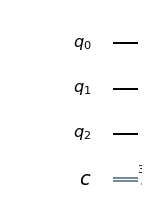

In [28]:
circ.draw(output='mpl')

In [29]:
circ.x(0)

In [30]:
circ.barrier()

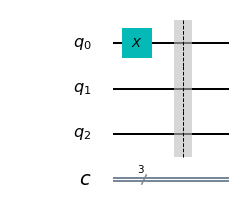

In [31]:
circ.draw(output='mpl')

In [32]:
circ.h(1)
circ.cx(1,2)

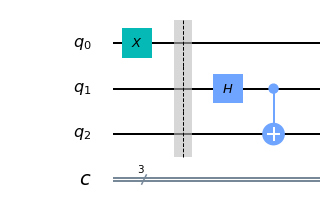

In [34]:
circ.draw(output='mpl')

In [35]:
circ.cx(0,1)
circ.h(0)

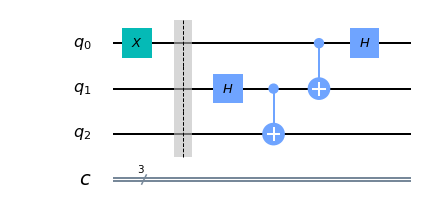

In [36]:
circ.draw(output='mpl')

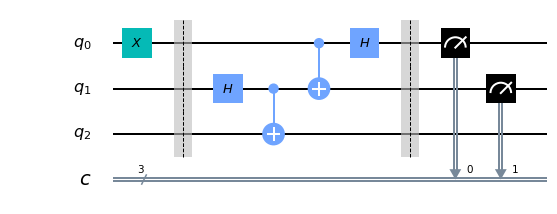

In [37]:
circ.barrier()
circ.measure([0,1], [0,1])
circ.draw(output='mpl')

In [38]:
circ.barrier()

In [39]:
circ.cx(1,2)
circ.cz(0,2)

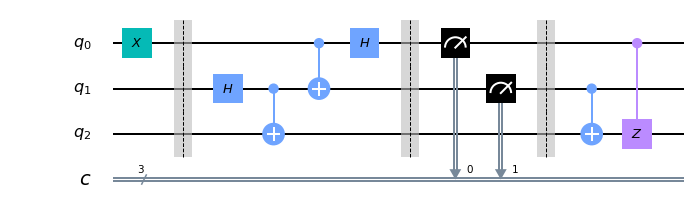

In [40]:
circ.draw(output='mpl')

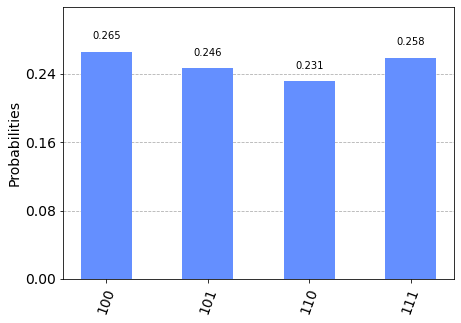

In [42]:
circ.measure(2,2)

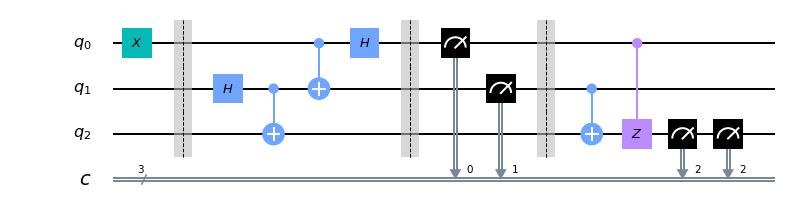

In [43]:
circ.draw(output='mpl')

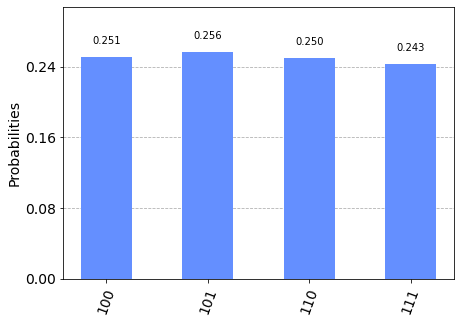

In [45]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circ, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

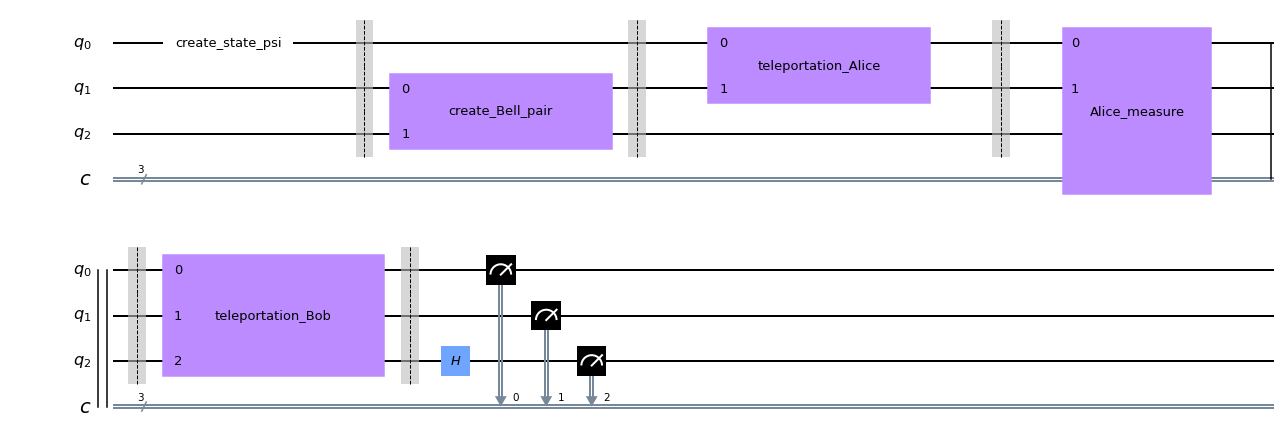

In [46]:
def create_state_psi(theta):
    create_circuit = QuantumCircuit(1, name='create_state_psi')
    create_circuit.h(0)
    create_circuit.rz(theta, 0)
    return create_circuit

def create_Bell_pair():
    create_Bell_circuit = QuantumCircuit(2, name='create_Bell_pair')
    create_Bell_circuit.h(0)
    create_Bell_circuit.cx(0,1)
    return create_Bell_circuit

def teleportation_Alice():
    teleportation_Alice_circuit = QuantumCircuit(2, name='teleportation_Alice')
    teleportation_Alice_circuit.cx(0,1)
    teleportation_Alice_circuit.h(0)
    return teleportation_Alice_circuit

def Alice_measure():
    Alice_measure_circuit = QuantumCircuit(2, 2, name='Alice_measure')
    Alice_measure_circuit.measure([0,1], [0,1])
    return Alice_measure_circuit

def teleportation_Bob():
    teleportation_Bob_circuit = QuantumCircuit(3, name='teleportation_Bob')
    teleportation_Bob_circuit.cx(1,2)
    teleportation_Bob_circuit.cz(0,2)
    return teleportation_Bob_circuit

def build_circuit(theta):
    circuit = QuantumCircuit(3, 3)
    circuit.append(create_state_psi(theta).to_instruction(), [0])
    circuit.barrier()
    circuit.append(create_Bell_pair().to_instruction(), [1,2])
    circuit.barrier()
    circuit.append(teleportation_Alice().to_instruction(), [0,1])
    circuit.barrier()
    circuit.append(Alice_measure().to_instruction(), [0,1], [0,1])
    circuit.barrier()
    circuit.append(teleportation_Bob().to_instruction(), [0,1,2])
    circuit.barrier()
    circuit.h(2)
    circuit.measure([0,1,2], [0,1,2])
    return circuit

circuit = build_circuit(0.01)
circuit.draw(output='mpl')

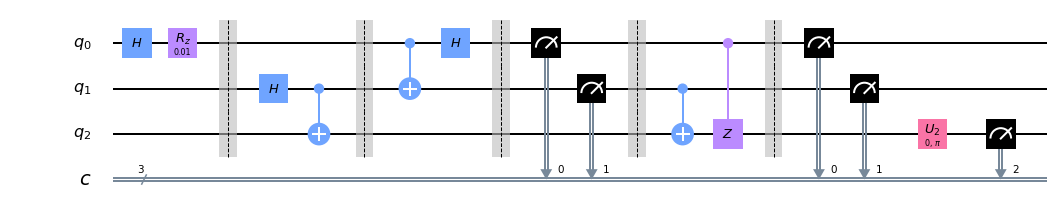

In [47]:
circuit.decompose().draw(output='mpl')

In [48]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts(circuit)
print(counts)
num_c2_zero = sum(counts[c2c1c0] for c2c1c0 in counts if c2c1c0[0] == '0')

{'000': 245, '011': 290, '010': 230, '001': 259}


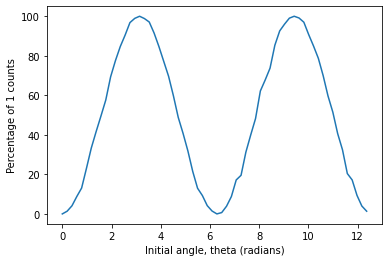

In [50]:
import numpy as np
thetas = np.arange(0, 4*np.pi, np.pi/16)

simulator = Aer.get_backend('qasm_simulator')

percent_ones = []

for theta in thetas:
    circuit = build_circuit(theta)
    result = execute(circuit, backend=simulator, shots=1024).result()
    counts = result.get_counts(circuit)
    num_c2_ones = sum(counts[c2c1c0] for c2c1c0 in counts if c2c1c0[0] == '1')
    percent_ones.append(num_c2_ones*100./1024)
    
import matplotlib.pyplot as plotter
plotter.plot(thetas, percent_ones)
plotter.xlabel('Initial angle, theta (radians)')
plotter.ylabel('Percentage of 1 counts')
plotter.show()

In [51]:
thetas = np.arange(0, 4*np.pi, np.pi/16)

circuits = []
for theta in thetas:
    circuit = build_circuit(theta)
    circuits.append(circuit)

In [57]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')

job = execute(circuits, backend=qcomp, shots=512, initial_layout=[6,8,7])
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Credentials are already in use. The existing account in the session will be replaced.


TranspilerError: "The 'layout' must be full (with ancilla)."